**Genomics of Drug Sensitivity in Cancer (GDSC) Analysis Project**

The Genomics of Drug Sensitivity in Cancer (GDSC) dataset provides key insights into the relationship between genomic alterations and drug response in cancer cell lines. This project uses machine learning techniques to classify cell lines as sensitive or resistant to drugs, aiming to support advancements in personalized cancer treatments.

The analysis pipeline includes data preprocessing, where missing values are handled, and categorical variables are encoded. To address the inherent class imbalance in the dataset, the SMOTETomek technique is applied, ensuring balanced training data for robust model performance. A Random Forest Classifier and an XGBoost Classifier are trained and evaluated using metrics like precision, recall, F1-score, and the AUC-ROC curve.

Additionally, feature importance analysis highlights the most influential genomic and molecular factors contributing to drug sensitivity predictions. The evaluation on an unbalanced test set ensures the models' robustness in real-world scenarios.

This project demonstrates the potential of machine learning in precision medicine, offering a pathway toward more effective, personalized cancer treatments.

dataset taken from Kaggle:https://www.kaggle.com/datasets/samiraalipour/genomics-of-drug-sensitivity-in-cancer-gdsc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


file_path = "/content/drive/MyDrive/Colab Notebooks/GDSC_Project/GDSC_DATASET.csv"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


gdsc= pd.read_csv(file_path)


Mounted at /content/drive




The dataset was loaded into a Pandas DataFrame for initial exploration. Basic descriptive statistics and structural information were retrieved to understand the data's dimensions, types, and completeness. Missing values were identified, and their proportions were calculated to guide the data cleaning process

In [ ]:
# Visualize  first 10 Rows
gdsc.head(10)

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY,Category
0,683667,736,18,1003,73,-1.463887,0.930220,0.433123,12,36,0,1,1,1,165,7,Sensible
1,684057,199,31,1003,73,-3.360586,0.791072,-0.599569,1,17,0,1,1,1,165,7,Sensible
2,684059,201,31,1003,73,-5.044940,0.592660,-1.516647,1,17,0,1,1,1,165,7,Sensible
3,684062,209,31,1003,73,-3.741991,0.734047,-0.807232,1,17,0,1,1,1,165,7,Sensible
4,684072,806,31,1003,73,-5.142961,0.582439,-1.570016,1,17,1,1,1,1,165,7,Sensible
5,687448,120,27,1003,73,-1.235034,0.867348,0.557727,15,37,0,1,1,1,165,7,Sensible
6,687452,4,2,1003,73,-2.632632,0.834067,-0.203221,19,54,3,2,2,2,165,7,Sensible
7,687455,777,2,1003,73,-2.963191,0.821438,-0.383200,18,2,0,1,1,1,165,7,Sensible
8,687457,887,2,1003,73,-1.449138,0.905050,0.441154,18,2,0,1,1,1,165,7,Sensible
9,687459,904,2,1003,73,-2.350633,0.843430,-0.049682,18,2,0,1,1,1,165,7,Sensible


In [ ]:

gdsc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242035 entries, 0 to 242034
Data columns (total 19 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   COSMIC_ID                                242035 non-null  int64  
 1   CELL_LINE_NAME                           242035 non-null  object 
 2   TCGA_DESC                                240968 non-null  object 
 3   DRUG_ID                                  242035 non-null  int64  
 4   DRUG_NAME                                242035 non-null  object 
 5   LN_IC50                                  242035 non-null  float64
 6   AUC                                      242035 non-null  float64
 7   Z_SCORE                                  242035 non-null  float64
 8   GDSC Tissue descriptor 1                 232669 non-null  object 
 9   GDSC Tissue descriptor 2                 232669 non-null  object 
 10  Cancer Type (matching TCGA label

The following attributes have some missing observations:



*   TCGA_DESC   
*   GDSC Tissue descriptor 1             

*   GDSC Tissue descriptor 2
*   Cancer Type (matching TCGA label)         

*   Microsatellite instability Status (MSI)
*   Screen Medium                            

*   Growth Properties
*   CNA  
*   Gene Expression

*    Methylation

*   TARGET

















In [ ]:

print("Missed value:\n")
print(gdsc.isnull().sum())


missing_percentage = (gdsc.isnull().sum() / len(gdsc)) * 100
print("% of missed value per columns :\n")
print(missing_percentage)


Missed value:

COSMIC_ID                                      0
CELL_LINE_NAME                                 0
TCGA_DESC                                   1067
DRUG_ID                                        0
DRUG_NAME                                      0
LN_IC50                                        0
AUC                                            0
Z_SCORE                                        0
GDSC Tissue descriptor 1                    9366
GDSC Tissue descriptor 2                    9366
Cancer Type (matching TCGA label)          51446
Microsatellite instability Status (MSI)    12353
Screen Medium                               9366
Growth Properties                           9366
CNA                                         9366
Gene Expression                             9366
Methylation                                 9366
TARGET                                     27155
TARGET_PATHWAY                                 0
dtype: int64
% of missed value per columns :

COSMIC_I


Columns with excessive missing values were removed to reduce noise and improve model performance

In [ ]:
#removing column with a lot of missing value

gdsc=gdsc.drop(columns=["Cancer Type (matching TCGA label)","Microsatellite instability Status (MSI)","Screen Medium"])

print("Most frequent value TARGET:", gdsc['TARGET'].mode()[0])


gdsc['TARGET'] = gdsc['TARGET'].fillna(gdsc['TARGET'].mode()[0])
print("MIssed value after imputation :", gdsc['TARGET'].isnull().sum())



print("Dimension after cleaning :", gdsc.shape)



Most frequent value TARGET: PARP1, PARP2
MIssed value after imputation : 0
Dimension after cleaning : (242035, 16)


Non-numeric categorical data were encoded using LabelEncoder to transform them into a format suitable for machine learning algorithms. This step was essential for enabling the models to process all features effectively.

In [ ]:

from sklearn.preprocessing import LabelEncoder



#Handling of Text and categorial Attributes

le = LabelEncoder()


categorical_columns = gdsc.select_dtypes(include=['object']).columns
print("Categorical columns to encode:", categorical_columns)


for col in categorical_columns:
    gdsc[col] = le.fit_transform(gdsc[col])

print("\nDataset after encoding:")
print(gdsc.head())

Categorical columns to encode: Index(['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'GDSC Tissue descriptor 1',
       'GDSC Tissue descriptor 2', 'Growth Properties', 'CNA',
       'Gene Expression', 'Methylation', 'TARGET', 'TARGET_PATHWAY'],
      dtype='object')

Dataset after encoding:
   COSMIC_ID  CELL_LINE_NAME  TCGA_DESC  DRUG_ID  DRUG_NAME   LN_IC50  \
0     683667             736         18     1003         73 -1.463887   
1     684057             199         31     1003         73 -3.360586   
2     684059             201         31     1003         73 -5.044940   
3     684062             209         31     1003         73 -3.741991   
4     684072             806         31     1003         73 -5.142961   

        AUC   Z_SCORE  GDSC Tissue descriptor 1  GDSC Tissue descriptor 2  \
0  0.930220  0.433123                        12                        36   
1  0.791072 -0.599569                         1                        17   
2  0.592660 -1.516647                   

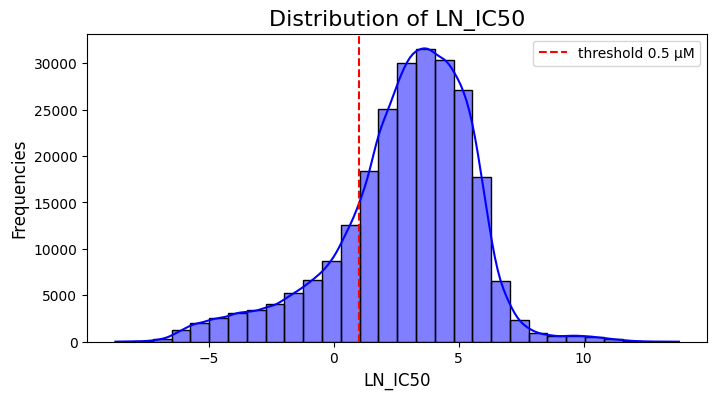

In [ ]:
# Distribution of IC50
plt.figure(figsize=(8, 4))
sns.histplot(gdsc['LN_IC50'], bins=30, kde=True, color='blue')

plt.axvline(x=1, color='red', linestyle='--', label='threshold 0.5 μM')
plt.title('Distribution of LN_IC50', fontsize=16)
plt.xlabel('LN_IC50', fontsize=12)
plt.ylabel('Frequencies', fontsize=12)
plt.legend()
plt.show()

The target variable LN_IC50 was used to create a new column, Category, to classify cancer cell lines as sensitive or resistant based on a threshold of 0.5. This threshold was chosen to reflect standard literature practices while aligning with the dataset's characteristics

In [ ]:
# Setting threshold based on common literature standards:

# LN(IC50) ≤ 0 (IC50 ≤ 1 μM): Sensitive cells
# - Drugs are highly effective at low concentrations (high sensitivity)

# LN(IC50) > 0 (IC50 > 1 μM): Resistant cells
# - Higher concentrations needed for effectiveness (low sensitivity)

# However, we chose LN(IC50) = 0.5 as the threshold

# - This provides a more conservative separation, reducing overlap
# - Balances the dataset better for classification purposes
# - Aligns with our specific dataset distribution and project goals


threshold =0.5

# creation column 'Category'
gdsc['Category'] = gdsc['LN_IC50'].apply(lambda x: 'Sensible' if x <= threshold else 'Resistent')



print(gdsc[['LN_IC50', 'Category']].head(30))


print("\nDistribution of the classes :")
print(gdsc['Category'].value_counts())





     LN_IC50   Category
0  -1.463887   Sensible
1  -3.360586   Sensible
2  -5.044940   Sensible
3  -3.741991   Sensible
4  -5.142961   Sensible
5  -1.235034   Sensible
6  -2.632632   Sensible
7  -2.963191   Sensible
8  -1.449138   Sensible
9  -2.350633   Sensible
10 -3.380879   Sensible
11 -2.255690   Sensible
12 -3.223910   Sensible
13 -3.400220   Sensible
14 -4.256286   Sensible
15 -2.999552   Sensible
16 -3.055500   Sensible
17 -2.060218   Sensible
18 -3.354018   Sensible
19 -2.450870   Sensible
20 -2.784359   Sensible
21  0.528845  Resistent
22  0.532792  Resistent
23 -1.629546   Sensible
24 -1.762080   Sensible
25 -1.157607   Sensible
26 -1.839524   Sensible
27 -4.135944   Sensible
28 -1.962265   Sensible
29  0.133024   Sensible

Distribution of the classes :
Category
Resistent    201480
Sensible      40555
Name: count, dtype: int64


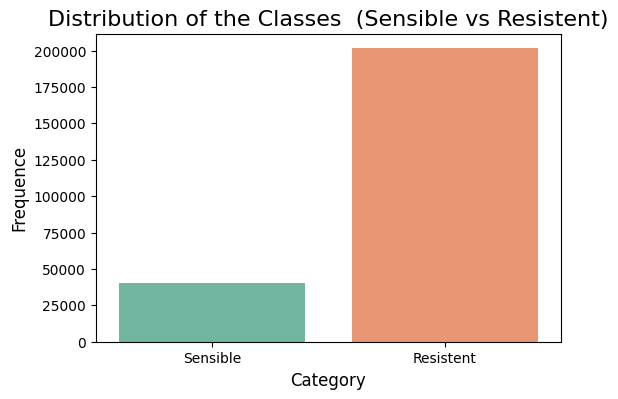

In [ ]:

plt.figure(figsize=(6, 4))
sns.countplot(data=gdsc, x='Category', hue='Category', palette='Set2', legend=False)

plt.title('Distribution of the Classes  (Sensible vs Resistent)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Frequence', fontsize=12)
plt.show()



In [ ]:
corr = gdsc.corr()
print(corr['Category'].sort_values(ascending=False))

Category                    1.000000
Growth Properties           0.080174
TARGET                      0.035616
DRUG_NAME                   0.019693
COSMIC_ID                   0.003201
CNA                        -0.003292
TCGA_DESC                  -0.003996
Methylation                -0.005307
Gene Expression            -0.011370
GDSC Tissue descriptor 1   -0.011519
CELL_LINE_NAME             -0.017624
GDSC Tissue descriptor 2   -0.039101
TARGET_PATHWAY             -0.044203
DRUG_ID                    -0.130223
Z_SCORE                    -0.304961
AUC                        -0.712440
LN_IC50                    -0.768387
Name: Category, dtype: float64


This approach combines oversampling of the minority class and undersampling of the majority class, creating a balanced training dataset. The resampled data ensured that the models could generalize well and avoid bias towards the majority class.



In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

X = gdsc.drop(columns=['Category', 'LN_IC50', 'AUC', 'Z_SCORE','COSMIC_ID', 'TCGA_DESC', 'DRUG_NAME'])
y = gdsc['Category']  # Target Var

# initial Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dimension of training Set:", X_train.shape)
print("Dimension of  Test set:", X_test.shape)


#This is to balance the class(I create synthetic data )

smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

print("Distribution After SMOTE:")
print(y_train_resampled.value_counts())


print("Distribuzione delle classi nel test set:")
print(y_test.value_counts())




Dimension of training Set: (169424, 10)
Dimension of  Test set: (72611, 10)
Distribution After SMOTE:
Category
0    137624
1    137624
Name: count, dtype: int64
Distribuzione delle classi nel test set:
Category
0    60444
1    12167
Name: count, dtype: int64


The first model trained was a Random Forest Classifier, chosen for its robustness and interpretability. After training on the balanced dataset, the model was evaluated on the original unbalanced test set to simulate real-world conditions

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5)  # 5-Fold Cross Validation
scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

print("Average accuracy with cross validation:", scores.mean())
print("Accuracy for each fold:", scores)

Average accuracy with cross validation: 0.9507463163566818
Accuracy for each fold: [0.90677566 0.96256131 0.96081744 0.96108921 0.96248797]


In [ ]:
# Evaluation of the model on the original imbalanced dataset
# ---------------------------------------------------------
# Although the model was trained on a balanced dataset using SMOTETomek,
# it is crucial to assess its performance on the original imbalanced dataset.
# This approach simulates a real-world scenario where the dataset may be skewed,
# ensuring that the model generalizes well beyond the artificially balanced training data.
# Main objectives:
# - Test if the model remains accurate when handling imbalanced distributions.
# - Identify any overfitting caused by training on the SMOTETomek-balanced dataset.
# - Verify the robustness of the model in realistic scenarios with non-uniform class distributions.
# ---------------------------------------------------------

# Training
rf.fit(X_train_resampled, y_train_resampled)

# Evaluation on  Test Set
y_pred_unbalanced = rf.predict(X_test)


print("Classification Report (Original Unbalanced Test Set):")
print(classification_report(y_test, y_pred_unbalanced))


Classification Report (Original Unbalanced Test Set):
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     60444
           1       0.71      0.75      0.73     12167

    accuracy                           0.91     72611
   macro avg       0.83      0.84      0.84     72611
weighted avg       0.91      0.91      0.91     72611



The performance of the trained models was visualized using a confusion matrix and an ROC curve. The confusion matrix illustrated the model's predictions compared to the actual labels, while the ROC curve depicted the trade-off between sensitivity and specificity, with the AUC value summarizing overall performance.

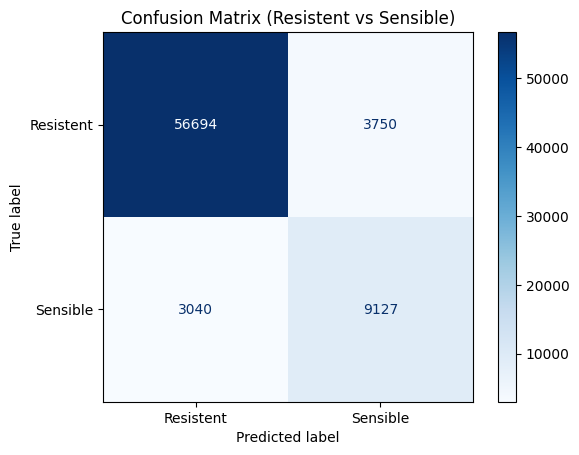

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report


conf_matrix = confusion_matrix(y_test, y_pred_unbalanced)


cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=["Resistent", "Sensible"])


cmd.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (Resistent vs Sensible)")
plt.show()

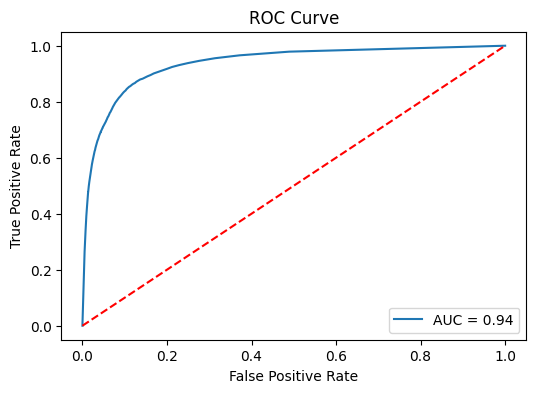

In [ ]:
from sklearn.metrics import roc_curve, auc


y_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()



The feature importance analysis reveals key biological insights into drug sensitivity. DRUG_ID emerges as the most significant feature, emphasizing that the chemical and pharmacological properties of specific drugs strongly influence the response. Similarly, TARGET and TARGET_PATHWAY highlight the critical role of molecular targets and the biological pathways they regulate, suggesting that the effectiveness of a drug is tightly linked to its mechanism of action and the cellular processes it disrupts. Tissue descriptors (GDSC Tissue descriptor 1 and GDSC Tissue descriptor 2) indicate that the tissue origin of cell lines impacts their sensitivity, possibly reflecting variations in tissue-specific gene expression or drug metabolism. Together, these findings underline the complex interplay between drug properties, molecular targets, and tissue context, offering valuable insights for tailoring treatments in precision medicine

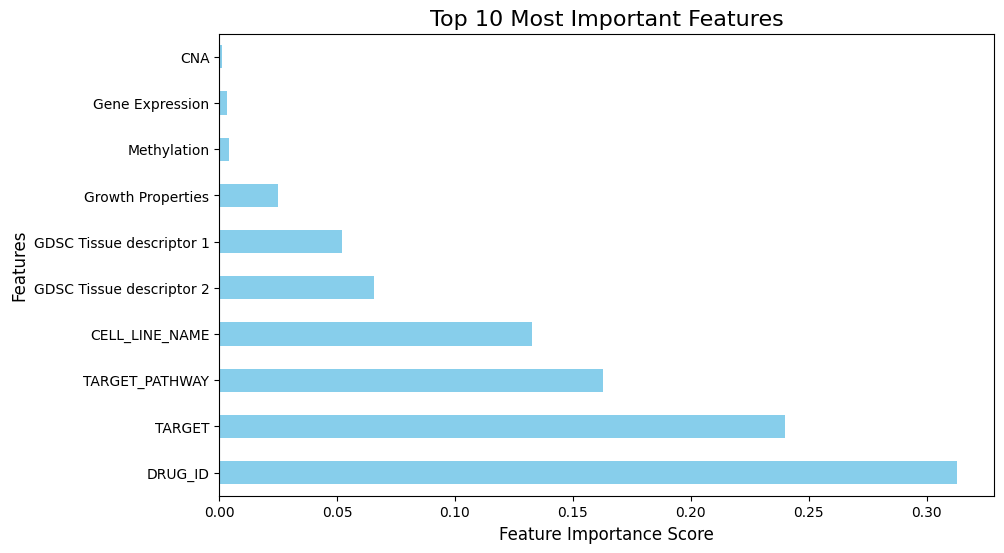

In [ ]:

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)


plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features', fontsize=16)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

A second model, the XGBoost Classifier, was optimized using RandomizedSearchCV for hyperparameter tuning
The classification report shows improvements in metrics such as precision, recall, and F1-score compared to the Random Forest model, particularly for the minority class (Sensitive).

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


le_y = LabelEncoder()
y_train_resampled_encoded = le_y.fit_transform(y_train_resampled)
y_test_encoded = le_y.transform(y_test)


xgb = XGBClassifier(random_state=42)


param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train_resampled, y_train_resampled_encoded)


print("Best Parameters:", random_search.best_params_)


best_xgb = random_search.best_estimator_


y_pred_xgb = best_xgb.predict(X_test)
y_pred_xgb_decoded = le_y.inverse_transform(y_pred_xgb)


print("Classification Report (XGBoost - Random Search):")
print(classification_report(y_test, y_pred_xgb_decoded))



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Classification Report (XGBoost - Random Search):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     60444
           1       0.73      0.82      0.77     12167

    accuracy                           0.92     72611
   macro avg       0.85      0.88      0.86     72611
weighted avg       0.92      0.92      0.92     72611

